In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [42]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [43]:
df.columns=['Month', 'Sales']

In [44]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [45]:
df.drop(105, axis=0, inplace=True)
df.drop(106, axis=0, inplace=True)

In [46]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [48]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [49]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [50]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

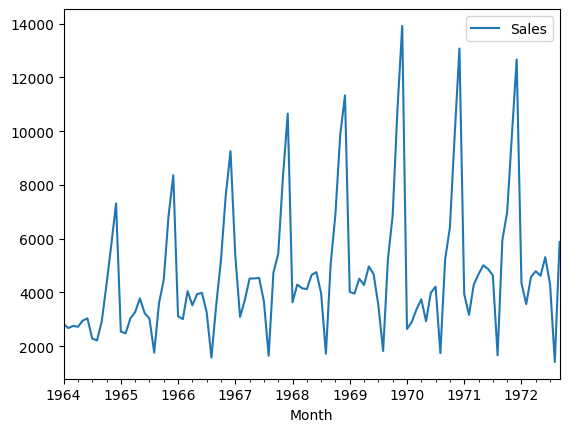

In [51]:
df.plot()
# plt.show()

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
test_result = adfuller(df['Sales'])

In [54]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ["ADF Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]
    
    for value, label in zip(result, labels):
        print(f"{label}: {value}")
    
    if result[1] < 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis.")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root.")

In [60]:
adfuller_test(sales)

NameError: name 'sales' is not defined

In [61]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [62]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [63]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [64]:
df['Sales'].shift(12)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: Sales, Length: 105, dtype: float64

In [65]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [66]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic: -7.626619157213164
p-value: 2.060579696813685e-11
#Lags Used: 0
Number of Observations Used: 92
Strong evidence against the null hypothesis, reject the null hypothesis.


<Axes: xlabel='Month'>

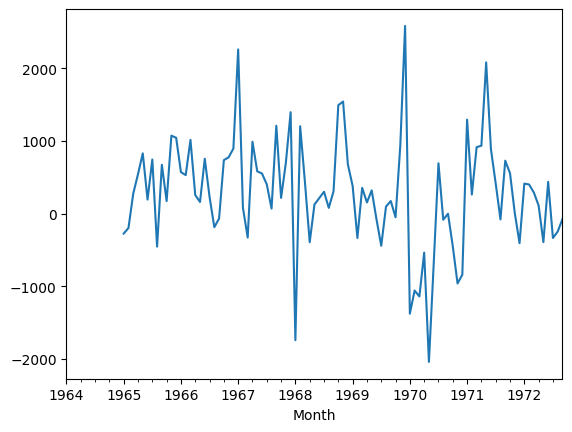

In [67]:
df['Seasonal First Difference'].plot()

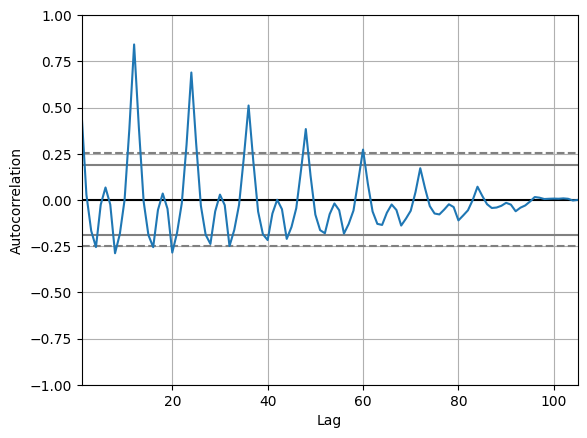

In [68]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Sales'])
plt.show()

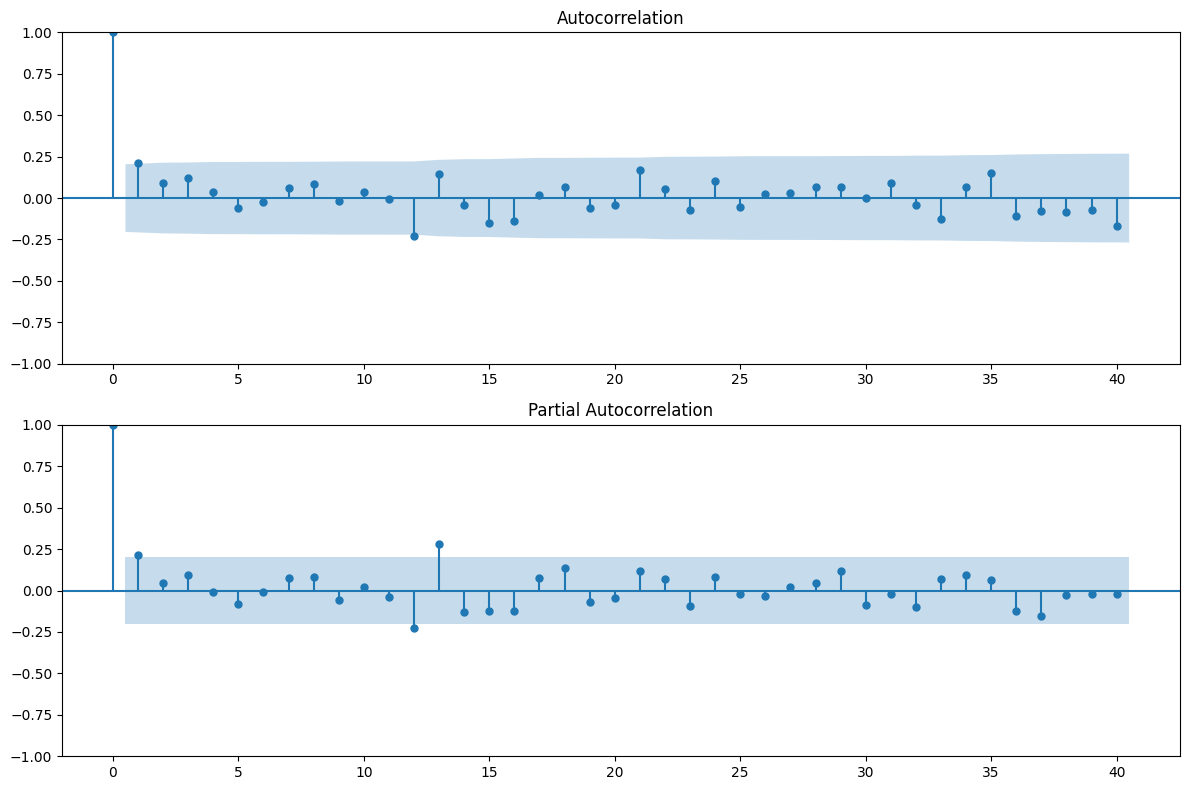

In [69]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' is your DataFrame and 'Seasonal First Difference' is the column of interest
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting ACF (Auto-Correlation Function)
plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)

# Plotting PACF (Partial Auto-Correlation Function)
plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

# Display the plots
plt.tight_layout()
plt.show()


In [74]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))

model_fit = model.fit()
print(model_fit.summary())

c:\Users\HP\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 06 Oct 2024   AIC                           1911.627
Time:                        16:02:00   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.0

In [75]:
model_fit = model.fit()

<Axes: xlabel='Month'>

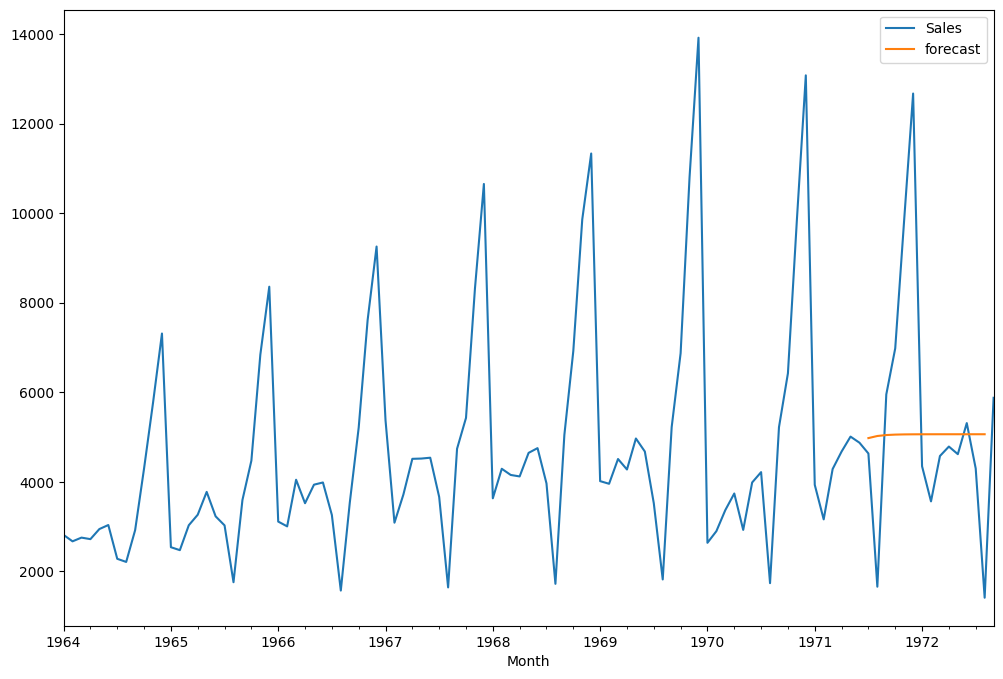

In [76]:
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [78]:
import statsmodels.api as sm

In [80]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1),seasonal_order=(1,1,1,12))

c:\Users\HP\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,5062.881623
1972-06-01,5312.0,694.0,438.0,5062.899238
1972-07-01,4298.0,-1014.0,-335.0,5062.907244
1972-08-01,1413.0,-2885.0,-246.0,5062.910883
1972-09-01,5877.0,4464.0,-74.0,NaN


In [83]:
import pandas as pd

# Generating future dates by adding months using pd.DateOffset
future_dates = [df.index[-1] + pd.DateOffset(months=x) for x in range(0, 24)]

# Displaying the future dates
future_dates


[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [85]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [87]:
future_df['forecast'] = results.predict(start=104, end=120, dynamic=True)
print(future_df[['forecast']])


NameError: name 'results' is not defined